In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
column_names = ['x','y','cluster']
df = pd.read_csv('spiral-dataset.csv', names=column_names, sep='\t')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        312 non-null    float64
 1   y        312 non-null    float64
 2   cluster  312 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.4 KB


,x,y,cluster
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [4]:
df.describe()

,x,y,cluster
count,312.000000,312.000000,312.000000
mean,18.408173,16.344712,2.016026
std,7.299923,6.867232,0.815682
min,3.000000,2.900000,1.000000
25%,12.912500,11.337500,1.000000
50%,18.325000,16.050000,2.000000
75%,23.400000,21.362500,3.000000
max,31.950000,31.650000,3.000000


### Question 1 

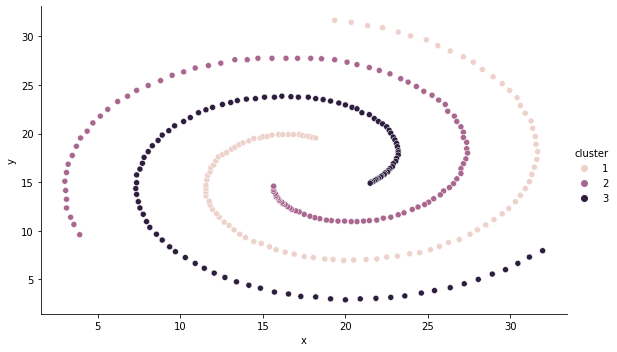

In [5]:
sns.relplot(data=df, x='x', y='y', hue='cluster', aspect=1.61)
plt.show()

### K-means
2-a, 2-b, 2-c with MS1

In [6]:
def eucledian_distance(x, y, mean_x, mean_y):
    point1 = np.array((x, y))
    point2 = np.array((mean_x, mean_y))
    # calculating Euclidean distance
    dist = np.linalg.norm(point1 - point2)
    return dist

In [7]:
def finding_cluster(val1, val2, val3):
    dist_array = np.array([val1, val2, val3])
    index = np.where(dist_array == np.amin(dist_array))[0][0] + 1
    col_name = 'dist'+str(index)
    return int(index)

In [12]:
#cluster means 
def cluster_mean_x(predicted_cluster, new_mean):
    return new_mean[int(predicted_cluster)-1][0]

def cluster_mean_y(predicted_cluster, new_mean):
    return new_mean[int(predicted_cluster)-1][1]

In [15]:
#calculating SSE
def SSE(x, y, cluster_mean_x, cluster_mean_y):
    return eucledian_distance(x, y, cluster_mean_x, cluster_mean_y)**2

In [20]:
#calculating rand_index
def rand_index(y_actual, y_pred):    
    assert(len(y_actual)==len(y_pred))
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    #@TODO
    for i in range(len(y_actual)):
        if y_actual[i] == 0:
            if y_actual[i]==y_pred[i]:
                TN =TN+1
            else:
                FP = FP+1             
        elif y_actual[i] == 1:
            if y_actual[i]==y_pred[i]:
                TP = TP+1
            else:
                FN = FN+1
                
    rand_ind = (TP+TN)/(TP+TN+FP+FN)
    

    return rand_ind

In [13]:
#### Generating the means
#The range of x is between 3 and 31.95
#The range of y is between 2.9 and 31.65
#Therefore generating the random means between the values 3 and 32
k_val = 3
mean_list = []

for i in range(1,k_val+1):
    #randomly generating x
    x = random.randint(3,32)
    
    #randomly generating y
    y = random.randint(3,32)

    mean_list.append([x,y])
    
mean_array = np.array([np.array(i) for i in mean_list])
print(mean_array)


#generating new_mean for initial comparision
new_mean_list = []
for i in range(1,k_val+1):
    new_mean_list.append([0,0])

new_mean_array = np.array([np.array(i) for i in new_mean_list])
print(new_mean_array)

[[25 30]
 [ 5 30]
 [ 3 24]]
[[0 0]
 [0 0]
 [0 0]]


In [14]:
old_mean = new_mean_array
new_mean = mean_array
itr = 0

while (~(old_mean==new_mean).all()):
    
    itr = itr + 1
    print(itr)
    print('old_mean : ',old_mean)
    print('new_mean : ',new_mean)
    
    #calculating eucldeian distance from each centroid
    #df[''] = df.apply(lambda row: EOQ(row['D'], row['p'], ck, ch), axis=1)
    df['dist1'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[0][0], new_mean[0][1]), axis=1)
    df['dist2'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[1][0], new_mean[1][1]), axis=1)
    df['dist3'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[2][0], new_mean[2][1]), axis=1)
                           
    #assigning cluster name
    df['predicted_cluster'] = df.apply(lambda row: finding_cluster(row['dist1'], row['dist2'], row['dist3']), axis=1)
                           
    computed_mean_list = []
    #recomputing means for each cluster and updating mean  
    for i in sorted(df['predicted_cluster'].unique()):
        computed_mean_list.append([round(df[df['predicted_cluster']==i]['x'].mean(),2), round(df[df['predicted_cluster']==i]['y'].mean(),2)])
            
    computed_mean = np.array([np.array(i) for i in computed_mean_list])
    print('computed mean : ',computed_mean)
    old_mean = new_mean
    new_mean = computed_mean      

1
old_mean :  [[0 0]
 [0 0]
 [0 0]]
new_mean :  [[25 30]
 [ 5 30]
 [ 3 24]]
computed mean :  [[23.72 17.5 ]
 [12.02 26.54]
 [11.78 14.  ]]
2
old_mean :  [[25 30]
 [ 5 30]
 [ 3 24]]
new_mean :  [[23.72 17.5 ]
 [12.02 26.54]
 [11.78 14.  ]]
computed mean :  [[24.72 16.2 ]
 [14.3  25.49]
 [12.44 12.65]]
3
old_mean :  [[23.72 17.5 ]
 [12.02 26.54]
 [11.78 14.  ]]
new_mean :  [[24.72 16.2 ]
 [14.3  25.49]
 [12.44 12.65]]
computed mean :  [[25.58 15.5 ]
 [15.53 24.06]
 [12.58 11.79]]
4
old_mean :  [[24.72 16.2 ]
 [14.3  25.49]
 [12.44 12.65]]
new_mean :  [[25.58 15.5 ]
 [15.53 24.06]
 [12.58 11.79]]
computed mean :  [[25.7  14.94]
 [16.01 23.87]
 [12.59 11.52]]
5
old_mean :  [[25.58 15.5 ]
 [15.53 24.06]
 [12.58 11.79]]
new_mean :  [[25.7  14.94]
 [16.01 23.87]
 [12.59 11.52]]
computed mean :  [[25.71 14.53]
 [16.36 23.85]
 [12.51 11.6 ]]
6
old_mean :  [[25.7  14.94]
 [16.01 23.87]
 [12.59 11.52]]
new_mean :  [[25.71 14.53]
 [16.36 23.85]
 [12.51 11.6 ]]
computed mean :  [[25.68 14.21]
 [16.

In [17]:
df['cluster_mean_x'] = df.apply(lambda row:  cluster_mean_x(row['predicted_cluster'], new_mean), axis=1)
df['cluster_mean_y'] = df.apply(lambda row:  cluster_mean_y(row['predicted_cluster'], new_mean), axis=1)
df['SSE'] = df.apply(lambda row:  SSE(row['x'], row['y'], row['cluster_mean_x'], row['cluster_mean_y']), axis=1)
df.head()

,x,y,cluster,dist1,dist2,dist3,predicted_cluster,cluster_mean_x,cluster_mean_y,SSE
0,31.95,7.95,3,9.490569,17.865847,22.899996,1,22.73,10.2,90.0709
1,31.15,7.30,3,8.905414,18.030696,22.404895,1,22.73,10.2,79.3064
2,30.45,6.65,3,8.497111,18.294986,22.037191,1,22.73,10.2,72.2009
3,29.70,6.00,3,8.137623,18.585492,21.661182,1,22.73,10.2,66.2209
4,28.90,5.55,3,7.726021,18.718467,21.180635,1,22.73,10.2,59.6914


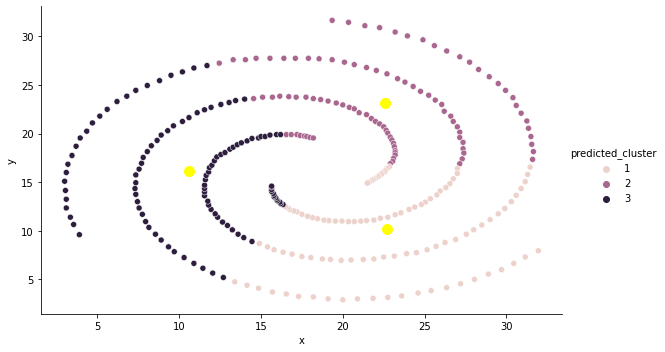

In [19]:
#visualization
sns.relplot(data=df, x='x', y='y', hue='predicted_cluster', aspect=1.61)
plt.scatter(new_mean[:,0],new_mean[:,1],s=100,c='yellow',label='Centroids')
plt.show()

In [25]:
#SSE
sse = df['SSE'].sum()
print(sse)

12313.906


In [21]:
#Random_index
y_true = df['cluster'].values
y_pred = df['predicted_cluster'].values
random_index = rand_index(y_true, y_pred)
print(random_index)

0.32673267326732675


#### Doing the next 9 iterations

In [24]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


Iteration :  1
Final Mean :  [[22.61 23.18]
 [10.58 16.18]
 [22.73 10.2 ]]


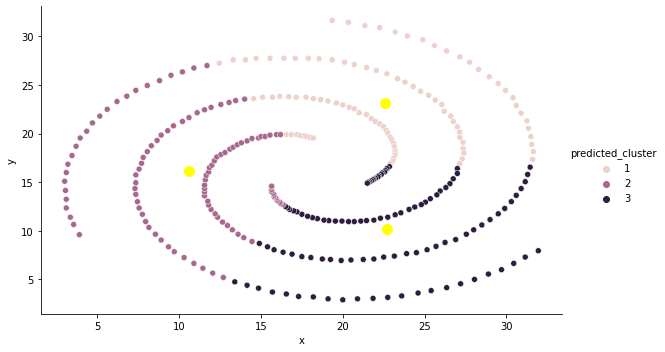

SSE :  12313.906
Rand Index :  0.31683168316831684
 
Iteration :  2
Final Mean :  [[23.86 21.97]
 [20.71  9.49]
 [10.27 18.03]]


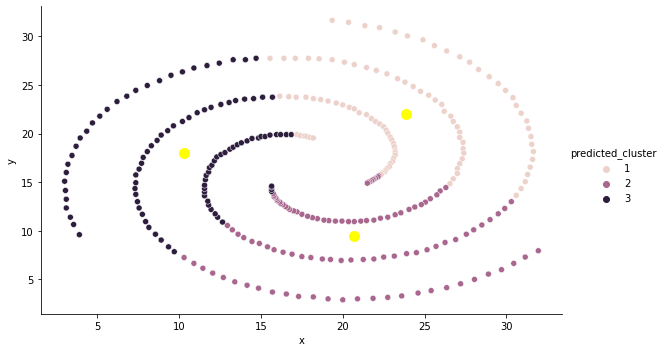

SSE :  12313.2833
Rand Index :  0.3465346534653465
 
Iteration :  3
Final Mean :  [[10.58 16.18]
 [22.61 23.18]
 [22.73 10.2 ]]


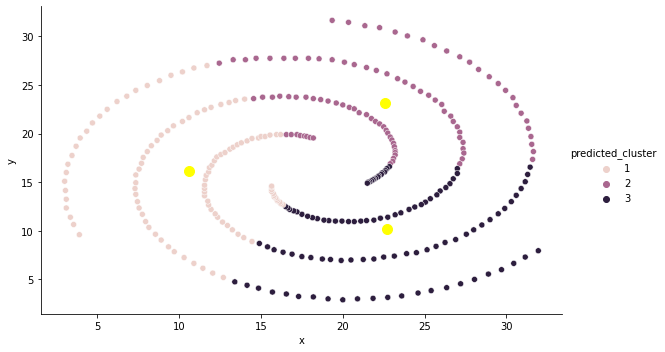

SSE :  12313.906
Rand Index :  0.3564356435643564
 
Iteration :  4
Final Mean :  [[10.58 16.18]
 [22.73 10.2 ]
 [22.61 23.18]]


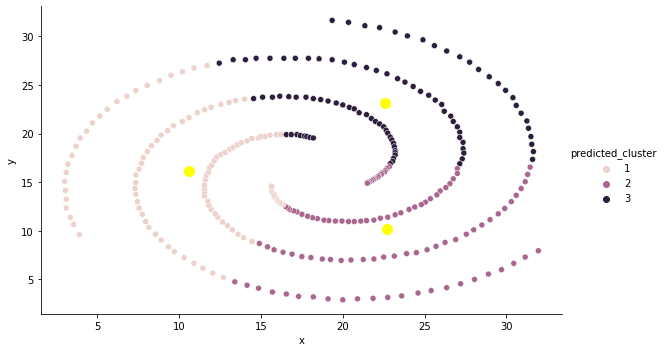

SSE :  12313.906
Rand Index :  0.3564356435643564
 
Iteration :  5
Final Mean :  [[22.73 10.2 ]
 [22.61 23.18]
 [10.58 16.18]]


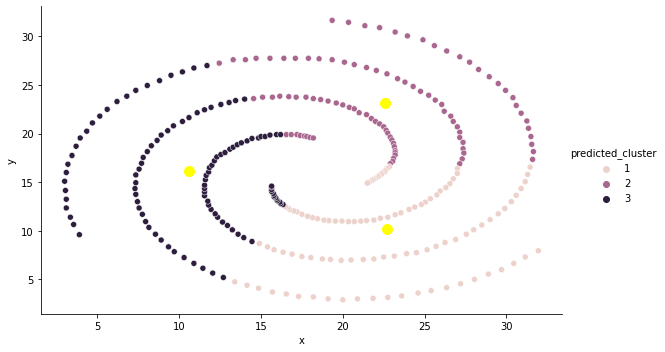

SSE :  12313.906
Rand Index :  0.32673267326732675
 
Iteration :  6
Final Mean :  [[22.5  10.16]
 [22.61 23.18]
 [10.47 16.39]]


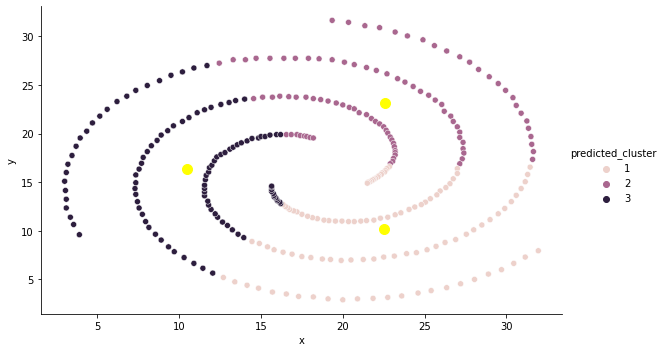

SSE :  12306.4673
Rand Index :  0.33663366336633666
 
Iteration :  7
Final Mean :  [[22.73 10.2 ]
 [22.61 23.18]
 [10.58 16.18]]


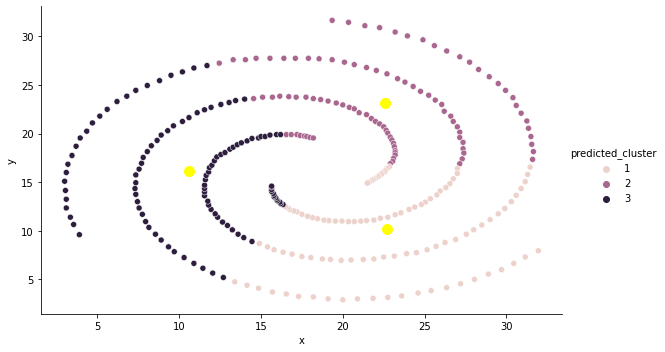

SSE :  12313.906
Rand Index :  0.32673267326732675
 
Iteration :  8
Final Mean :  [[10.31 17.71]
 [21.09  9.6 ]
 [23.7  22.24]]


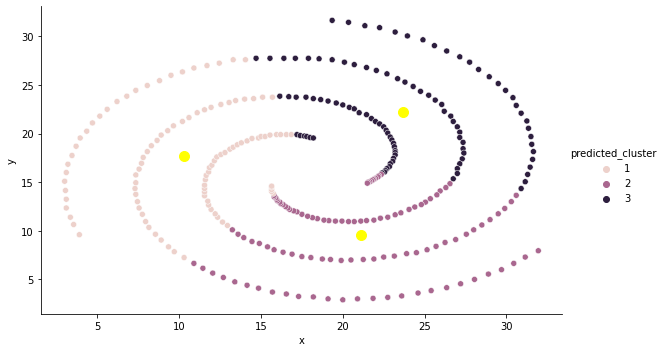

SSE :  12295.285899999999
Rand Index :  0.33663366336633666
 
Iteration :  9
Final Mean :  [[21.09  9.6 ]
 [23.7  22.24]
 [10.31 17.71]]


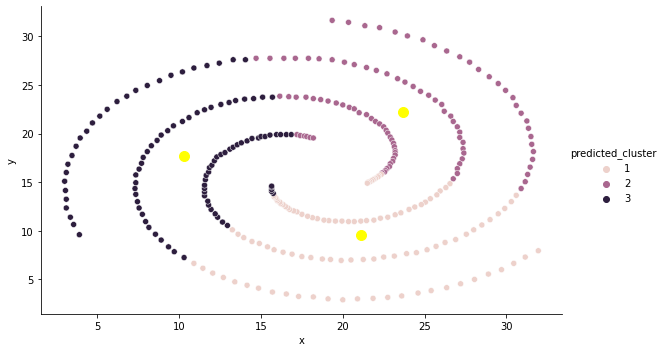

SSE :  12295.285899999999
Rand Index :  0.32673267326732675
 


In [31]:
k_val = 3
sse_list = [sse]
rand_ind_list = [random_index]


for i in range(1,10):
    
    print('Iteration : ', i)
    
    #initializing means
    mean_list = []
    for i in range(1,k_val+1):
        x = random.randint(3,32)
        y = random.randint(3,32)
        mean_list.append([x,y])
    mean_array = np.array([np.array(i) for i in mean_list])


    #generating new_mean for initial comparision
    new_mean_list = []
    for i in range(1,k_val+1):
        new_mean_list.append([0,0])

    new_mean_array = np.array([np.array(i) for i in new_mean_list])

    old_mean = new_mean_array
    new_mean = mean_array
    itr = 0

    #k-means
    while (~(old_mean==new_mean).all()):

        itr = itr + 1
        
        #calculating eucldeian distance from each centroid
        #df[''] = df.apply(lambda row: EOQ(row['D'], row['p'], ck, ch), axis=1)
        df['dist1'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[0][0], new_mean[0][1]), axis=1)
        df['dist2'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[1][0], new_mean[1][1]), axis=1)
        df['dist3'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[2][0], new_mean[2][1]), axis=1)

        #assigning cluster name
        df['predicted_cluster'] = df.apply(lambda row: finding_cluster(row['dist1'], row['dist2'], row['dist3']), axis=1)

        computed_mean_list = []
        #recomputing means for each cluster and updating mean  
        for i in sorted(df['predicted_cluster'].unique()):
            computed_mean_list.append([round(df[df['predicted_cluster']==i]['x'].mean(),2), round(df[df['predicted_cluster']==i]['y'].mean(),2)])

        computed_mean = np.array([np.array(i) for i in computed_mean_list])
        old_mean = new_mean
        new_mean = computed_mean    
        
    print('Final Mean : ',new_mean)
    df['cluster_mean_x'] = df.apply(lambda row:  cluster_mean_x(row['predicted_cluster'], new_mean), axis=1)
    df['cluster_mean_y'] = df.apply(lambda row:  cluster_mean_y(row['predicted_cluster'], new_mean), axis=1)
    df['SSE'] = df.apply(lambda row:  SSE(row['x'], row['y'], row['cluster_mean_x'], row['cluster_mean_y']), axis=1)

    #visualization
    sns.relplot(data=df, x='x', y='y', hue='predicted_cluster', aspect=1.61)
    plt.scatter(new_mean[:,0],new_mean[:,1],s=100,c='yellow',label='Centroids')
    plt.show()
    
    #sse
    sse = df['SSE'].sum()
    sse_list.append(sse)
    print('SSE : ',sse)
    
    #rand_index
    y_true = df['cluster'].values
    y_pred = df['predicted_cluster'].values
    random_index = rand_index(y_true, y_pred)
    rand_ind_list.append(random_index)
    print('Rand Index : ',random_index)
    print(' ')

In [33]:
print('SSE for 10 iterations : ',sse_list)
print('Rand Index for 10 iterations : ',rand_ind_list)

SSE for 10 iterations :  [12313.906, 12313.906, 12313.2833, 12313.906, 12313.906, 12313.906, 12306.4673, 12313.906, 12295.285899999999, 12295.285899999999]
Rand Index for 10 iterations :  [0.31683168316831684, 0.31683168316831684, 0.3465346534653465, 0.3564356435643564, 0.3564356435643564, 0.32673267326732675, 0.33663366336633666, 0.32673267326732675, 0.33663366336633666, 0.32673267326732675]


In [34]:
print('Best SSE : ',min(sse_list))

Best SSE :  12295.285899999999


In [35]:
print('Best Rand Index : ',max(rand_ind_list))

Best Rand Index :  0.3564356435643564
